## Assignment 1

### Problem 1

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


In [2]:
## (c)
# simulate BM path
N1 = 3650
zt1 = np.cumsum(np.random.normal(size=N1-1) * np.sqrt(1/N1))
zt1 = np.insert(zt1,0,0)

# geometric BM function
def gbm(t, wt, mu, sigma, s0=1):
    return s0 * np.exp( sigma*wt + (mu - 1/2*sigma**2)*t )

# simulate geometric BM path
mu = 0.06
sigma = 0.2
times1 = [0+i*(1/N1) for i in range(1,N1+1)]
times1.insert(0,0)
st1 = [gbm(times1[t], zt1[t], mu, sigma) for t in range(N1)]


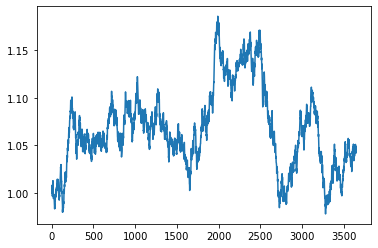

In [3]:
## (d) plot the daily share prices
plt.plot(st1)


In [4]:
## (e) daily continuously compounded returns
rt1 = np.diff(np.log(st1))


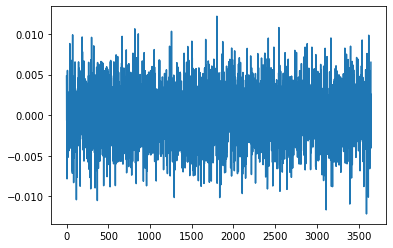

In [5]:
## (f)
plt.plot(rt1)


In [6]:
## (g)
rt1_ymean = 365*np.mean(rt1)
rt1_ystdv = np.sqrt(365)*np.std(rt1)
print("annualized mean of daily log-returns:", rt1_ymean, "\nannualized standard deviation of daily log-returns:", rt1_ystdv)


annualized mean of daily log-returns: 0.0047690485198631045 
annualized standard deviation of daily log-returns: 0.06335711804911907


### Problem 2


The sample has 25933 observations.


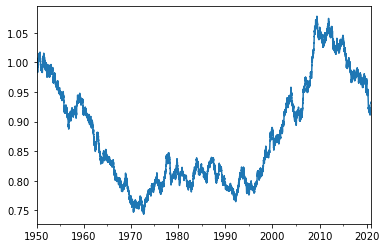

In [7]:
## (b) & (c)
idx = pd.period_range('1950-01-01','2020-12-31',freq='D')
N2 = len(idx)
zt2 = np.cumsum(np.random.normal(size=N2-1) * np.sqrt(1/N2))
zt2 = np.insert(zt2,0,0)
times2 = [0+i*(1/N2) for i in range(1,N2+1)]
times2.insert(0,0)
st2 = [gbm(times2[t], zt2[t], mu, sigma) for t in range(N2)]
st2 = pd.Series(st2,index=idx)
st2.plot()
print('The sample has',N2,'observations.')


In [8]:
st2
type(st2)

pandas.core.series.Series

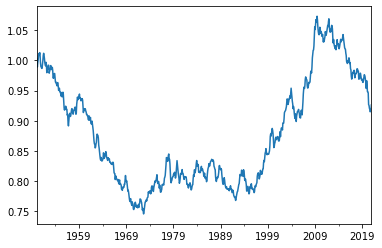

In [9]:
## (d) & (e)
st2_monavg = st2.resample(rule='M').mean()
st2_monavg.plot()


### Problem 3

In [10]:
## (a)
# daily
logr_d = st2.apply(math.log).diff()

# weekly
st2_w = st2.resample('W').first()
logr_w = st2_w.apply(math.log).diff()

# monthly
st2_m = st2.resample('M').first()
logr_m = st2_m.apply(math.log).diff()

In [11]:
## (b)
print('Daily log returns summary statistics:', logr_d.describe(), sep='\n')
print('Weekly log returns summary statistics:', logr_w.describe(), sep='\n')
print('Monthly log returns summary statistics:', logr_m.describe(), sep='\n')


Daily log returns summary statistics:
count    25932.000000
mean        -0.000003
std          0.001238
min         -0.004812
25%         -0.000837
50%         -0.000002
75%          0.000835
max          0.005057
dtype: float64
Weekly log returns summary statistics:
count    3705.000000
mean       -0.000019
std         0.003293
min        -0.013177
25%        -0.002224
50%        -0.000018
75%         0.002232
max         0.011080
dtype: float64
Monthly log returns summary statistics:
count    851.000000
mean      -0.000099
std        0.007118
min       -0.024213
25%       -0.004411
50%       -0.000201
75%        0.004398
max        0.022770
dtype: float64


In [12]:
## (c)
# daily
logr_d_ymean = 365*np.mean(logr_d)
logr_d_ystdv = np.sqrt(365)*np.std(logr_d)
print("annualized mean of daily log-returns: ", logr_d_ymean, "\nannualized standard deviation of daily log-returns: ", logr_d_ystdv)

# weekly
logr_w_ymean = 365/7*np.mean(logr_w)
logr_w_ystdv = np.sqrt(365/7)*np.std(logr_w)
print("annualized mean of weekly log-returns: ", logr_w_ymean, "\nannualized standard deviation of weekly log-returns: ", logr_w_ystdv)

# monthly
logr_m_ymean = 12*np.mean(logr_m)
logr_m_ystdv = np.sqrt(12)*np.std(logr_m)
print("annualized mean of monthly log-returns: ", logr_m_ymean, "\nannualized standard deviation of monthly log-returns: ", logr_m_ystdv)


annualized mean of daily log-returns:  -0.0010125913306650329 
annualized standard deviation of daily log-returns:  0.02365964504814025
annualized mean of weekly log-returns:  -0.0009697814820545981 
annualized standard deviation of weekly log-returns:  0.023772588811185418
annualized mean of monthly log-returns:  -0.0011924303415207754 
annualized standard deviation of monthly log-returns:  0.02464139538462837


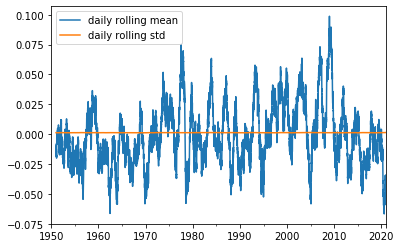

In [63]:
## (d)
# daily
logr_d_mean = logr_d.rolling(365).sum()
logr_d_std = logr_d.rolling(365).std()

logr_d_mean.plot()
logr_d_std.plot()
plt.legend(['daily rolling mean', 'daily rolling std'])


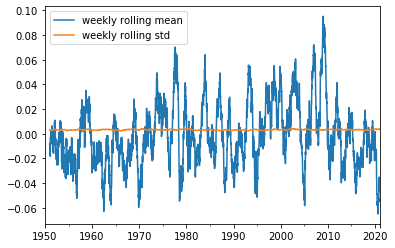

In [14]:
# weekly
logr_w_mean = logr_w.rolling(52).sum()
logr_w_std = logr_w.rolling(52).std()

logr_w_mean.plot()
logr_w_std.plot()
plt.legend(['weekly rolling mean', 'weekly rolling std'])



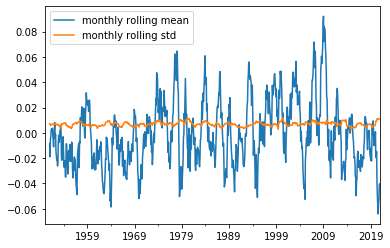

In [15]:
# monthly
logr_m_mean = logr_m.rolling(12).sum()
logr_m_std = logr_m.rolling(12).std()

logr_m_mean.plot()
logr_m_std.plot()
plt.legend(['monthly rolling mean', 'monthly rolling std'])


In [16]:
## (e)
print("annualized mean of daily log-returns: ", logr_d_mean.describe(), "\n")
print("annualized mean of weekly log-returns: ", logr_w_mean.describe(), "\n")
print("annualized mean of monthly log-returns: ", logr_m_mean.describe(), "\n")
print("annualized standard deviation of daily log-returns: ", logr_d_std.describe(),"\n")
print("annualized standard deviation of weekly log-returns: ", logr_w_std.describe(),"\n")
print("annualized standard deviation of monthly log-returns: ", logr_m_std.describe(),"\n")


annualized mean of daily log-returns:  count    25568.000000
mean        -0.001056
std          0.025744
min         -0.066785
25%         -0.019010
50%         -0.004392
75%          0.014407
max          0.098721
dtype: float64 

annualized mean of weekly log-returns:  count    3654.000000
mean       -0.001058
std         0.025771
min        -0.064886
25%        -0.019310
50%        -0.004505
75%         0.014534
max         0.095196
dtype: float64 

annualized mean of monthly log-returns:  count    840.000000
mean      -0.001020
std        0.025809
min       -0.064143
25%       -0.019721
50%       -0.004081
75%        0.014137
max        0.092165
dtype: float64 

annualized standard deviation of daily log-returns:  count    25568.000000
mean         0.001236
std          0.000045
min          0.001101
25%          0.001205
50%          0.001235
75%          0.001269
max          0.001391
dtype: float64 

annualized standard deviation of weekly log-returns:  count    3654.000000
mean

#### from the above summary statistics, we can see the variation in the annualized mean and standard deviation. For the annualized mean, with all frequencies, they are almost the same, with the weekly one slightly smaller than the other two. For the annualized standard deviation, the variation is hugely different, with the daily one the smallest.


In [69]:
## (f)
# There are leap (bissextile) years so there are more than 71*365 days
# between 1950-01-01 and 2020-12-31 (all bins cannot contain 365 days).

#daily
logr_d_ymean = logr_d.resample('Y').mean()
logr_d_yvar = logr_d.resample('Y').var()

#montly
logr_m_ymean = logr_m.resample('Y').mean()
logr_m_yvar = logr_m.resample('Y').var()

In [71]:
#daily
meanOfMean_d = logr_d_ymean.mean()
varOfMean_d = logr_d_ymean.var()

#monthly
meanOfMean_m = logr_m_ymean.mean()
varOfMean_m = logr_m_ymean.var()

In [73]:
print('Daily:\n', 'Mean:', meanOfMean_d, 'Var:', varOfMean_d)
print('Monthly:\n', 'Mean:', meanOfMean_m, 'Var:', varOfMean_m)

Daily:
 Mean: -2.7775105642180545e-06 Var: 6.583530431922391e-09
Monthly:
 Mean: -0.00010024597208969258 Var: 5.704303430893766e-06


### Problem 4

In [18]:
# pip install wrds

In [19]:
# pip install psycopg2-binary

In [20]:
import wrds

In [21]:
db = wrds.Connection(wrds_username='alina925')
db.create_pgpass_file()

Enter your WRDS username [jonkq]:jonkq
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [27]:
## (c) get data for each company
aapl=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='2001-01-01' and date<='2020-12-31'")
aapl.to_csv('aapl.csv')

gs=db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='2001-01-01' and date<='2020-12-31'")
gs.to_csv('gs.csv')

msft=db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='2001-01-01' and date<='2020-12-31'")
msft.to_csv('msft.csv')

pg=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='2001-01-01' and date<='2020-12-31'")
pg.to_csv('pg.csv')

ge=db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='2001-01-01' and date<='2020-12-31'")
ge.to_csv('ge.csv')


In [28]:
## (d) read files
aapl = pd.read_csv('aapl.csv', index_col=0)
gs = pd.read_csv('gs.csv', usecols=['ret']).squeeze()
msft = pd.read_csv('msft.csv', usecols=['ret']).squeeze()
pg = pd.read_csv('pg.csv', usecols=['ret']).squeeze()
ge = pd.read_csv('ge.csv', usecols=['ret']).squeeze()

In [29]:
# convert date string to datetime
aapl.date = pd.to_datetime(aapl.date)

# concatenate series into one dataframe
ret = pd.DataFrame({'date': aapl.date, 'aapl': aapl.ret, 'gs':gs,
                   'msft':msft, 'pg':pg, 'ge':ge})

# set datetime as pd index
ret = ret.set_index('date')

# compute gross return df
Ret = ret + 1

# compute log return df
logR = Ret.apply(np.log)

In [30]:
## (e)
# repeat (a) log returns
logR_w = logR.resample('W').first().diff() #weekly
logR_m = logR.resample('M').first().diff() #monthly

In [37]:
# repeat (b)
print('Daily log returns:', logR.describe(), sep='\n\n')
print('\nWeeky log returns:', logR_w.describe(), sep='\n\n')
print('\nMonthly log returns:', logR_m.describe(), sep='\n\n')

Daily log returns:

              aapl           gs         msft           pg           ge
count  5032.000000  5032.000000  5032.000000  5032.000000  5032.000000
mean      0.001264     0.000227     0.000552     0.000360    -0.000174
std       0.023160     0.022636     0.018260     0.011855     0.021047
min      -0.197470    -0.210223    -0.159453    -0.091428    -0.164394
25%      -0.009671    -0.009845    -0.007782    -0.005020    -0.008503
50%       0.000949     0.000338     0.000380     0.000373     0.000000
75%       0.012613     0.010664     0.008922     0.005958     0.008369
max       0.130194     0.234818     0.170626     0.113409     0.179844

Weeky log returns:

              aapl           gs         msft           pg           ge
count  1043.000000  1043.000000  1043.000000  1043.000000  1043.000000
mean      0.000034     0.000075     0.000009     0.000006     0.000087
std       0.033602     0.037488     0.027474     0.016239     0.032448
min      -0.171414    -0.418127    -

In [49]:
# repeat (c)
logR_d_ymean = 365*logR.mean()
logR_d_ystdv = math.sqrt(365)*logR.std()

logR_w_ymean = 52*logR_w.mean()
logR_w_ystdv = math.sqrt(52)*logR_w.mean()

logR_m_ymean = 12*logR_m.mean()
logR_m_ystdv = math.sqrt(12)*logR_m.mean()

print('Annualized mean of daily returns:', logR_d_ymean, sep='\n')
print('Annualized std of daily returns:', logR_d_ystdv, sep='\n')
print('Annualized mean of weekly returns:', logR_w_ymean, sep='\n')
print('Annualized std of weekly returns:', logR_w_ystdv, sep='\n')
print('Annualized mean of monthly returns:', logR_m_ymean, sep='\n')
print('Annualized std of monthly returns:', logR_m_ystdv, sep='\n')

Annualized mean of daily returns:
aapl    0.461440
gs      0.082786
msft    0.201450
pg      0.131238
ge     -0.063590
dtype: float64
Annualized std of daily returns:
aapl    0.442468
gs      0.432452
msft    0.348852
pg      0.226495
ge      0.402095
dtype: float64
Annualized mean of weekly returns:
aapl    0.001752
gs      0.003883
msft    0.000492
pg      0.000307
ge      0.004510
dtype: float64
Annualized std of weekly returns:
aapl    0.000243
gs      0.000538
msft    0.000068
pg      0.000043
ge      0.000625
dtype: float64
Annualized mean of monthly returns:
aapl    0.001524
gs      0.003838
msft    0.000499
pg      0.000140
ge      0.004441
dtype: float64
Annualized std of monthly returns:
aapl    0.000440
gs      0.001108
msft    0.000144
pg      0.000041
ge      0.001282
dtype: float64


Text(0.5, 1.0, 'Yearly rolling std')

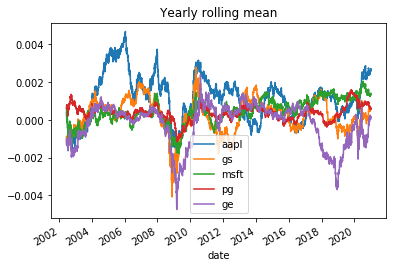

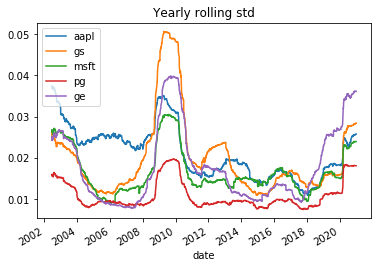

In [62]:
# repeat (d)
# daily
logR_d_rmean = logR.rolling(365).mean()
logR_d_rstdv = logR.rolling(365).std()

logR_d_rmean.plot()
plt.title('Daily rolling mean')
logR_d_rstdv.plot()
plt.title('Daily rolling std')

Text(0.5, 1.0, 'Yearly rolling std')

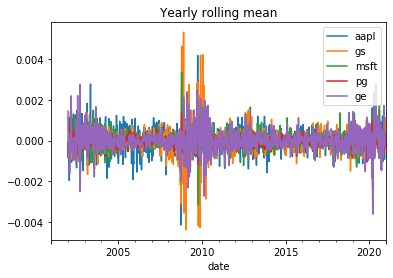

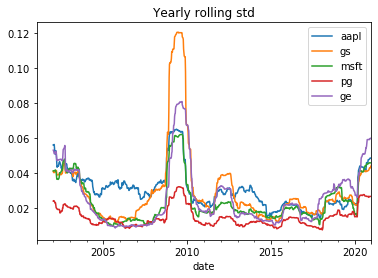

In [58]:
# weekly
logR_w_rmean = logR_w.rolling(52).mean()
logR_w_rstdv = logR_w.rolling(52).std()

logR_w_rmean.plot()
plt.title('Weekly rolling mean')
logR_w_rstdv.plot()
plt.title('Weekly rolling std')

Text(0.5, 1.0, 'Yearly rolling std')

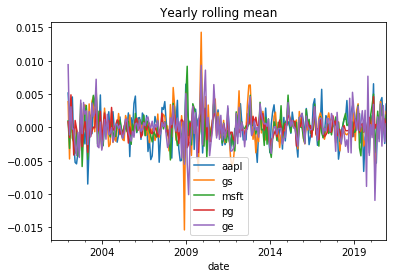

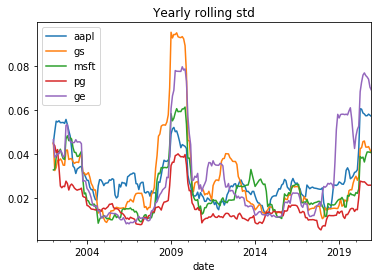

In [59]:
# monthly
logR_m_rmean = logR_m.rolling(12).mean()
logR_m_rstdv = logR_m.rolling(12).std()

logR_m_rmean.plot()
plt.title('Monthly rolling mean')
logR_m_rstdv.plot()
plt.title('Monthly rolling std')

#### (d)
The mean of returns seem to become more stationary as the sampling frequency decreases (i.e weekly series is more stationary than the daily one). This is however not observed with the standard deviation of returns, whose pattern is rather unchanged with sampling frequency, and which looks like a random walk.

In the simulated data case, both the mean and standard deviation seem to be stationary accross all sampling frequencies, with the standard deviation almost looking constant. The reason for this difference might be that the geometric brownian motion incorporates a deterministic drift and diffusion component, whereas in reality these two might be dynamic (or random).

Volatility is clearly higher towards the beginning of 2020, as it is in 2008-2009 during the subprime crisis and the beginning of 2000s with the internet bubble.